# Water Diffusion Coefficient Correlation Comparison: Plot.
## Karina Chiñas Fuentes
28.10.24

Correlations obtained from [doi:10.1016/j.pecs.2010.06.002](https://www.sciencedirect.com/science/article/pii/S0360128510000511).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

plt.rc('font',family = 'serif')
plt.rcParams["mathtext.fontset"] = "cm"


def get_file(filename_):
    with open(filename_, "r") as file:
        file_content = file.readlines()
    df = pd.DataFrame(file_content, columns=['data'])
    return df

In [2]:
def D_nmw_Eq6(λ, T):
    # This is Eq.(16) from the reference paper.
    constant = 2.692661843e-10
    exp_factor = np.exp(2416*(1/303 - 1/T))
    if λ <= 2:
        return constant
    elif 2 < λ <= 3:
        return 1e-10*exp_factor*(0.87*(3 - λ) + 2.95*(λ - 2))
    elif 3 < λ <= 4:
        return 1e-10*exp_factor*(2.95*(4 - λ) + 1.642454*(λ - 3))
    elif λ > 4:
        return 1e-10*exp_factor*(2.563 - 0.33*λ + 0.0264*λ**2 - 0.000671*λ**3)
    
def D_nmw_Eq4(λ,T):
    # This is Eq.(17) from the reference paper.
    if 0 < λ <= 3:
        return 3.1e-7*λ*(np.exp(0.28*λ)-1)*np.exp(-2346/T)
    elif 3 < λ <= 17:
        return 4.17e-8*λ*(1 + 161*np.exp(-λ))*np.exp(-2346/T)
    else:
        return 4.1e-10*((λ/25)**0.15)*(1+np.tanh((λ-2.5)/1.4))

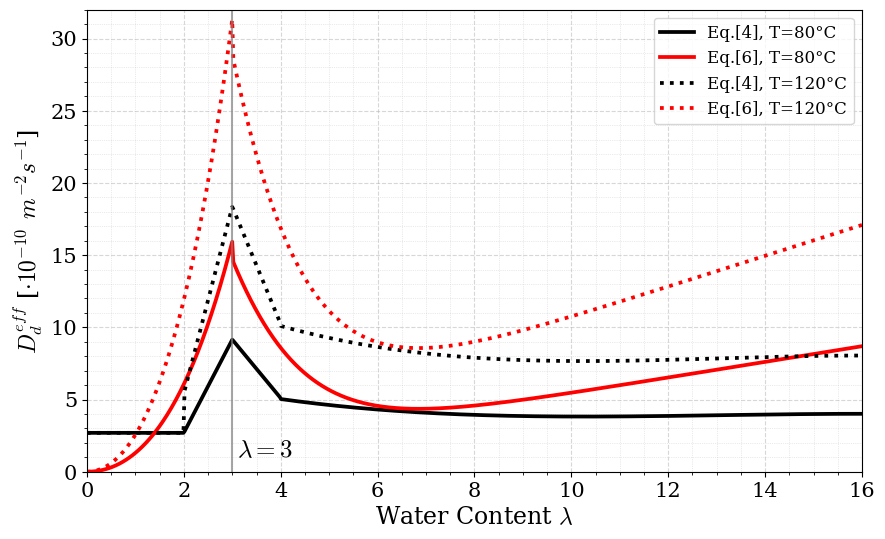

In [3]:
# Plot
lambda_values = np.linspace(0, 16, 700)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, np.array([D_nmw_Eq6(lmbda,353.15) for lmbda in lambda_values])*1e10,
         label='Eq.[4], T=80°C', color='k', lw=2.7)
plt.plot(lambda_values, np.array([D_nmw_Eq4(lmbda,353.15) for lmbda in lambda_values])*1e10,
         label='Eq.[6], T=80°C', color='r', lw=2.7)
plt.plot(lambda_values, np.array([D_nmw_Eq6(lmbda,393.15) for lmbda in lambda_values])*1e10,
         label='Eq.[4], T=120°C', color='k', lw=2.7, ls=":")
plt.plot(lambda_values, np.array([D_nmw_Eq4(lmbda,393.15) for lmbda in lambda_values])*1e10,
         label='Eq.[6], T=120°C', color='r', lw=2.7, ls=":")


plt.xlabel('Water Content $\lambda$', fontsize=17)
plt.ylabel('$D^{eff}_{d}$ [$\cdot 10^{-10} \:\:m^{-2}s^{-1}$]', fontsize=17)
plt.grid(alpha=0.5, which="both", ls="--")
plt.legend(fontsize=12)

plt.axvline(3,c="gray", alpha=0.7)

plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)  

plt.minorticks_on()
plt.text(3.1,1,"$\lambda=3$", fontsize=18)
plt.grid(which='minor', linestyle=':', linewidth=0.5)

ax = plt.gca()
ax.set_ylim([0, 32])
ax.set_xlim([0, 16])

plt.show()